<a href="https://colab.research.google.com/github/ffreirea1988/usm/blob/main/EDA%20-%20Afectaci%C3%B3n%20Clientes%20FIF%20completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

In [6]:
#Carga de datos
df_ACX = pd.read_excel('/content/Consolidado 2022 Banking (CL-PE-CO).xlsx'
                       #Si deseas que el ID de la tabla sea un campo dado de la tabla. En este caso: Clave de incidencia
                       #,index_col='Clave de incidencia'
                       )

In [8]:
#(Filas, Columnas)
df_ACX.shape

(1137, 12)

In [4]:
#Columnas
df_ACX.columns

Index(['Año', 'MES', 'Pais', 'Dia', 'Clave de incidencia', 'Nmb_Exp_Corp',
       'Institución responsable', 'Tipificación', 'Vertical Responsable',
       'Affected Services', 'Resumen', 'Afectación'],
      dtype='object')

In [9]:
#Columnas y formato
df_ACX.dtypes

Año                        float64
MES                         object
Pais                        object
Dia                          int64
Clave de incidencia         object
Nmb_Exp_Corp                object
Institución responsable     object
Tipificación                object
Vertical Responsable        object
Affected Services           object
Resumen                     object
Afectación                   int64
dtype: object

In [10]:
df_ACX.head()
df_ACX.tail()

,Año,MES,Pais,Dia,Clave de incidencia,Nmb_Exp_Corp,Institución responsable,Tipificación,Vertical Responsable,Affected Services,Resumen,Afectación
1132,NaN,NaN,CMRMX,20,GDEIP-1592,NaN,FTC,Redes y Comunicaciones,FTC,Datacenter,[CORP] Caída en múltiples servicios,0
1133,NaN,NaN,CMRMX,25,GDEIP-1970,NaN,NEGOCIO,Paso a Producción,CMRMX,Paytrue,[CMRMX] Falla en la activación de tarjetas des...,31
1134,NaN,NaN,CMRMX,27,GDEIP-2961,NaN,FIF,Falla del Software,Cores,Paytrue,[BFCORP] Paytrue error en recibir trx NRT para...,0
1135,NaN,NaN,CMRMX,27,GDEIP-2962,NaN,FTC,Redes y Comunicaciones,FTC,APP Mobile Parlo SAP SAT (Core Tarjetas) Weblo...,[CROSS]Caida servicios SAT Mexico y CMR Puntos...,0
1136,NaN,NaN,CMRMX,15,GDEIP-2306,NaN,NEGOCIO,Error humano,CMRMX,PagoQR,[CMRMX] Compras TC QR – Android no llega hacia...,50


In [11]:
#Muestra análisis estadístico de variables numéricas
df_ACX.describe()

,Año,Dia,Afectación
count,1111.000000,1137.000000,1.137000e+03
mean,2022.627363,16.108179,1.257854e+04
std,0.483724,8.699082,1.800972e+05
min,2022.000000,1.000000,0.000000e+00
25%,2022.000000,8.000000,5.100000e+01
50%,2023.000000,17.000000,4.640000e+02
75%,2023.000000,23.000000,2.699000e+03
max,2023.000000,31.000000,5.959750e+06


In [12]:
#Eliminar filas NA
df_ACX_sinNA = df_ACX.dropna()
#Reemplazar valores NA
#Forma básica: reemplazar nulos por ceros: df_ACX_ReemplazoNA = df_ACX.fillna(0)
df_ACX_ReemplazoNA = df_ACX.fillna({'Año':2023, 'MES': 0})
print(df_ACX_sinNA.shape)
print(df_ACX.shape)
print(df_ACX_ReemplazoNA.shape)

(1081, 12)
(1137, 12)
(1137, 12)


In [13]:
#Filtrar por columnas
df_clientes = df_ACX_ReemplazoNA[['Año', 'MES', 'Pais', 'Dia', 'Clave de incidencia', 'Nmb_Exp_Corp',
       'Institución responsable', 'Tipificación', 'Vertical Responsable',
       'Affected Services', 'Resumen', 'Afectación']]

In [38]:
#Filtrar por filas
#Filtrar por número de la fila
df_clientes.iloc[0:10]
df_clientes.iloc[0]
df_clientes.iloc[[0, 1, 2]]

#Filtrar por el valor del ID seleccionado (Clave de incidencia)
df_clientes.loc[[0,1],['Clave de incidencia','Afectación']]

#Filtrar por condiciones:
df_clientes[df_clientes['Afectación']>100]
df_clientes[(df_clientes['Afectación']>100) & (df_clientes['Nmb_Exp_Corp']=="Transferencias") & df_clientes['Resumen'].str.contains("BFCL")]

,Año,MES,Pais,Dia,Clave de incidencia,Nmb_Exp_Corp,Institución responsable,Tipificación,Vertical Responsable,Affected Services,Resumen,Afectación,Transacciones
0,2022.0,junio,BFCL,14,GDEIP-1574,Transferencias,NaN,Redes y Comunicaciones,FTC,Transferencias,[BFCL] - Caída 356 ATM's + Otros servicios,10324,51620
8,2022.0,julio,BFCL,13,GDEIP-1644,Transferencias,NaN,Base de Datos,FTC,Transferencias,[BFCL] - Errores en Servicio TercerosTransfere...,18029,90145
9,2022.0,julio,BFCL,6,GDEIP-1628,Transferencias,FIF,Base de Datos,Cores,Transferencias,[BFCL] - Revision TEF por Problemas,1746,8730
11,2022.0,julio,BFCL,19,GDEIP-1666,Transferencias,NaN,Paso a Producción,Cores,APP Mobile,[BFCL] Errores en la App,16848,84240
12,2022.0,julio,BFCL,25,GDEIP-1683,Transferencias,NEGOCIO,Error de Terceros,BFCL Integraciones,Transferencias,[BFCL] Problemas en TEF,5000,25000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,2023.0,junio,BFCL,30,GDEIP-3487,Transferencias,FTC,Infraestructura,FTC,Pagos Tuxedo,[BFCL] tiempos altos en multiples servicios.,9177,45885
1029,2023.0,junio,BFCL,30,GDEIP-3512,Transferencias,FIF,Falla del Software,Integraciones,APP Mobile WebDesktop,"[BFCL] Alerta con Transferencias Env, generan ...",5971,29855
1077,2023.0,julio,BFCL,13,GDEIP-3573,Transferencias,FTC,Base de Datos,NaN,Transferencias,[BFCL] Problemas con servicio de Transferencias,26444,132220
1081,2023.0,julio,BFCL,6,GDEIP-3528,Transferencias,FIF,Falla del Software,Integraciones,Canjes,[BFCL] Altos tiempos en múltiples servicios,36877,184385


In [39]:
#Definir funciones de transformación
def TRX(a):
  b = a * 5
  return b

#Incorporar nueva columna a partir de la función
df_clientes['Transacciones'] = df_clientes['Afectación'].apply(TRX)

In [40]:
df_clientes.columns
df_clientes.head()

,Año,MES,Pais,Dia,Clave de incidencia,Nmb_Exp_Corp,Institución responsable,Tipificación,Vertical Responsable,Affected Services,Resumen,Afectación,Transacciones
0,2022.0,junio,BFCL,14,GDEIP-1574,Transferencias,NaN,Redes y Comunicaciones,FTC,Transferencias,[BFCL] - Caída 356 ATM's + Otros servicios,10324,51620
1,2022.0,junio,BFCL,18,GDEIP-1586,Transferencias,FTC,Redes y Comunicaciones,FTC,APP Mobile Paytrue Transferencias WebDesktop,[CORP] - Error en multiples servicios,152838,764190
2,2022.0,junio,BFCL,2,GDEIP-1526,Consolidada,NaN,Falla del Software,Canales Digitales,APP Mobile,[BFCL] Error al obtener últimos movimientos pa...,19318,96590
3,2022.0,junio,BFCL,20,GDEIP-1590,Transferencias,FIF,Redes y Comunicaciones,FTC,Transferencias,[BFCL] Lentitud en Servicios varios,0,0
4,2022.0,junio,BFCL,20,GDEIP-1592,Transferencias,FTC,Redes y Comunicaciones,FTC,Datacenter,[CORP] Caída en múltiples servicios,679,3395


In [23]:
#Agrupar de datos en una columna (Group By):
#Promedio para todas las variables numéricas
df_clientes.groupby('Vertical Responsable').mean({'Afectación':'mean','Transacciones':'sum'})

,Año,Dia,Afectación,Transacciones
Vertical Responsable,,,,
BFCL,2022.507692,17.938462,6789.615385,33948.076923
BFCL BFPE,2023.000000,7.500000,169.250000,846.250000
BFCL Canales Digitales,2022.000000,5.000000,0.000000,0.000000
BFCL Canales Digitales CMR Seguros Cores Cores/Devops FIF,2023.000000,26.000000,0.000000,0.000000
BFCL Canales Digitales FTC Integraciones,2022.000000,5.000000,1941.000000,9705.000000
BFCL Cores,2023.000000,22.250000,14499.125000,72495.625000
BFCL FTC,2022.500000,15.500000,3392.000000,16960.000000
BFCL Integraciones,2022.333333,14.333333,14162.666667,70813.333333
BFCL Integraciones Onboarding,2022.000000,21.000000,157.000000,785.000000


In [27]:
#Guardo agrupación en variable y luego la trabajo:
agrupacion = df_clientes.groupby('Vertical Responsable').mean({'Afectación':'mean','Transacciones':'sum'})
#Afectación total mayor a 100.000
agrupacion[agrupacion['Afectación']>100000]

,Año,Dia,Afectación,Transacciones
Vertical Responsable,,,,
FTC Integraciones OTROS,2022.0,4.0,196997.0,984985.0


**Librería matplotlib para gráficos**

In [28]:
#Importo librería para gráficos:
import matplotlib.pyplot as plt

<Axes: xlabel='Vertical Responsable'>

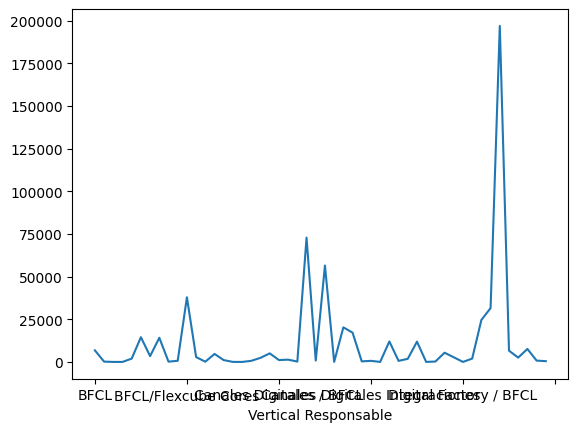

In [34]:
agrupacion['Afectación'].plot() #Gráfico de línea

<Axes: xlabel='Vertical Responsable'>

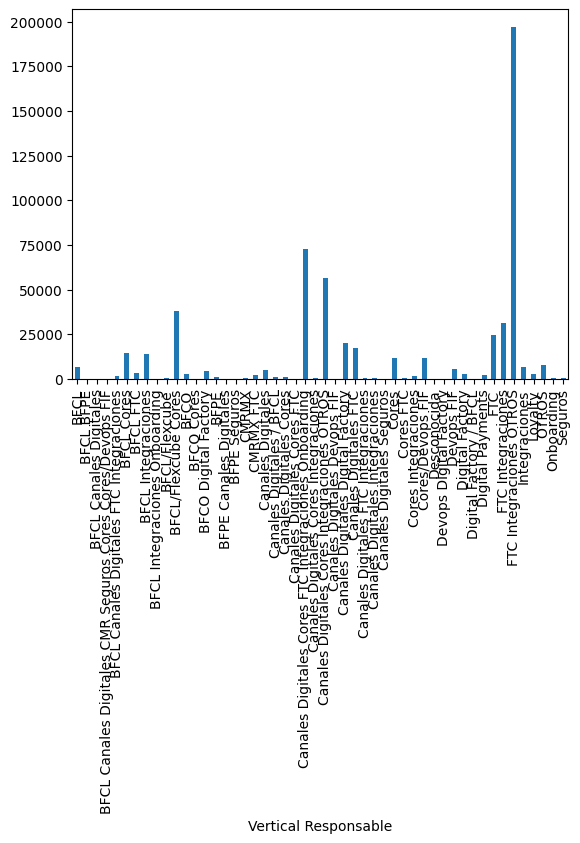

In [35]:
agrupacion['Afectación'].plot(kind='bar') #Gráfico de barras

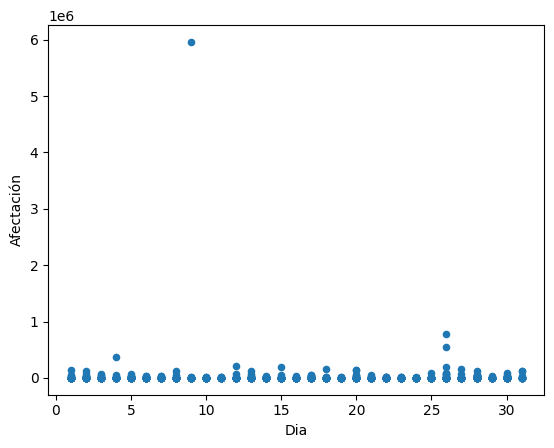

In [48]:
#Gráfico de puntos: scatter (ambos ejes deben ser variables numéricas)
df_clientes.plot(kind='scatter', x='Dia', y='Afectación')
plt.show()

In [49]:
#Generar nuevo archivo csv desde mi dataframe modificado:
agrupacion.to_csv('nombre_archivo.csv')